Importing necessary libraries and setting global configurations.

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Assigning the red- and white-wine datasets into DataFrames, and combining them into a single dataset.   
We are also adding a type-variable, to distinguish between red- and white wines.

In [ ]:
red_wine_data = pd.read_csv('../data/winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv('../data/winequality-white.csv', delimiter=';')

red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'

combined_data = pd.concat([red_wine_data, white_wine_data], axis=0)
combined_data.reset_index(drop=True, inplace=True)
wine_data = combined_data.copy()
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Checking the shape of the dataset to get a quick overview of the amount of rows and columns.

In [6]:
print(f'The dataset has {wine_data.shape[0]} rows and {wine_data.shape[1]} columns')

The dataset has 6497 rows and 13 columns


Exploring some basic statistics about our dataset.

In [7]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


Checking whether the dataset has null-values that need to be dealt-with.

In [8]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

We can see that none of our variables have null-values, indicating that we are working with a high-quality dataset.  
Thus, no further action is needed on this part.

One-hot encoding the type-column, so that it is converted from a string format into a boolean format for more efficient processing.  
We are also dropping the original type-column, as it is no longer needed, since we now have the boolean red/white-columns in the dataset instead.

In [9]:
wine_data = pd.concat([wine_data, pd.get_dummies(wine_data['type'])], axis=1)
wine_data = wine_data.drop('type', axis=1)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False


Plotting the distributions of wine quality levels in the dataset.

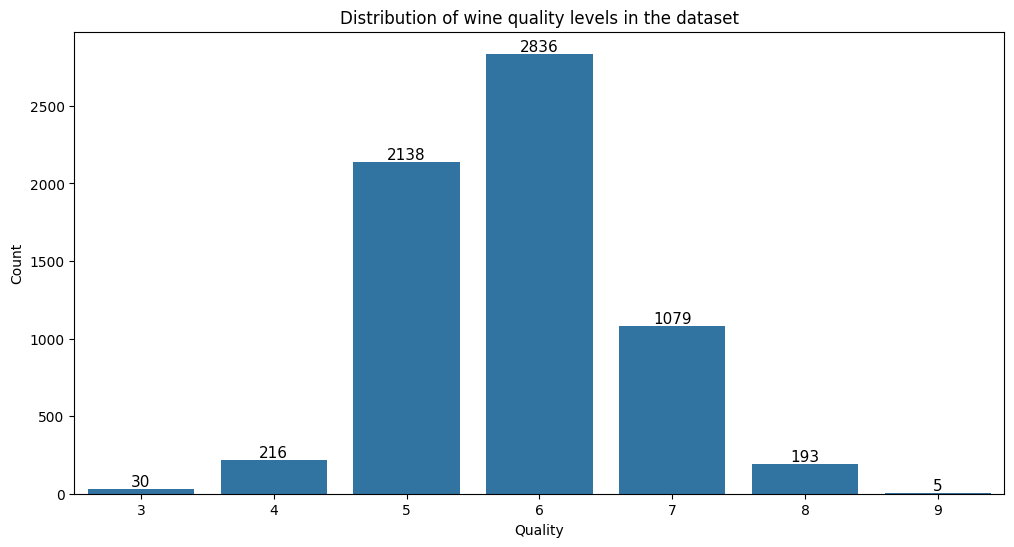

In [10]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of wine quality levels in the dataset')
plt.xlabel('Quality')
plt.ylabel('Count')

# Adding value markers.
for p in ax.patches:
    ax.annotate(f'{int(round(p.get_height()))}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Binarizing the quality-attribute of the wine to be either good-quality, or low-quality wine.   
With my limited domain knowledge of wines, I have decided to just set the threshold at the quality level 5, which is approximately the halfway point of the qualities.   
This means, that wines with a quality rating of 5 or below are considered low-quality, and wines with quality levels ranging from 6 and above are considered high-quality.  

In [11]:
wine_data.loc[:, "high quality flag"] = wine_data["quality"].apply(lambda x: 1 if x > 5 else 0)
wine_data = wine_data.drop(columns=["quality"])
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,white,high quality flag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,True,False,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,True,False,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,True,False,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,True,False,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,True,False,0


Plotting the distributions again after binarizing the quality-attribute.

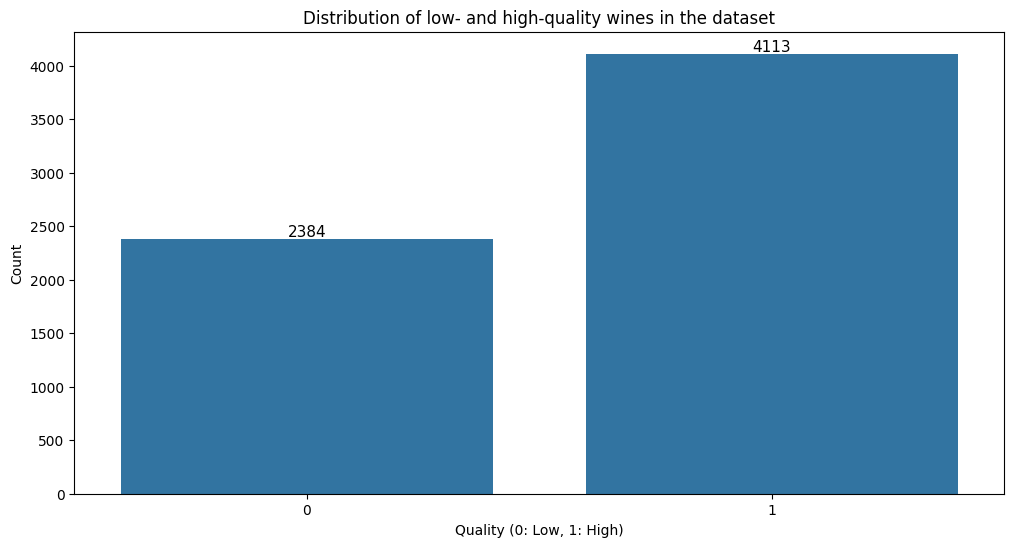

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='high quality flag', data=wine_data)
plt.title('Distribution of low- and high-quality wines in the dataset')
plt.xlabel('Quality (0: Low, 1: High)')
plt.ylabel('Count')

# Adding value markers
for p in ax.patches:
    ax.annotate(f'{int(round(p.get_height()))}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

As we can see, the quality-levels are somewhat imbalanced, which may lead to bias and other issues during the training phase, affecting model accuracy in a negative way.  
We may have to take this into account later on when selecting our model.

Performing correlation analysis to analyze the relationships between features and potentially identify features that are highly correlated.  
This is done to identify features that might cause multicollinearity.  

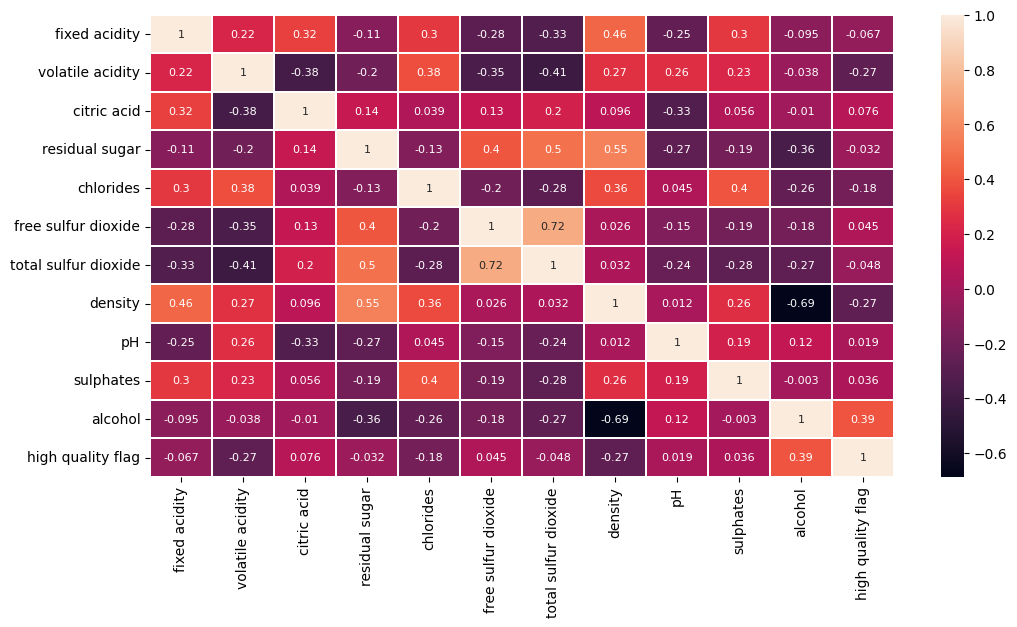

In [13]:
correlation_matrix = wine_data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.2, annot_kws={"size": 8})
plt.show()

The general rule for multicollinearity is that if correlation is > 0.8, then severe multicollinearity may occur (Massimiliano et al. 2017).  
In our dataset, no feature-pairs reach this threshold, although for example free- and total sulfur dioxide come quite close (0.72).  
Hence we do not need to drop any of our features at this point.

Plotting a box plot in order to examine the general distribution of datapoints within various features to check for outliers.

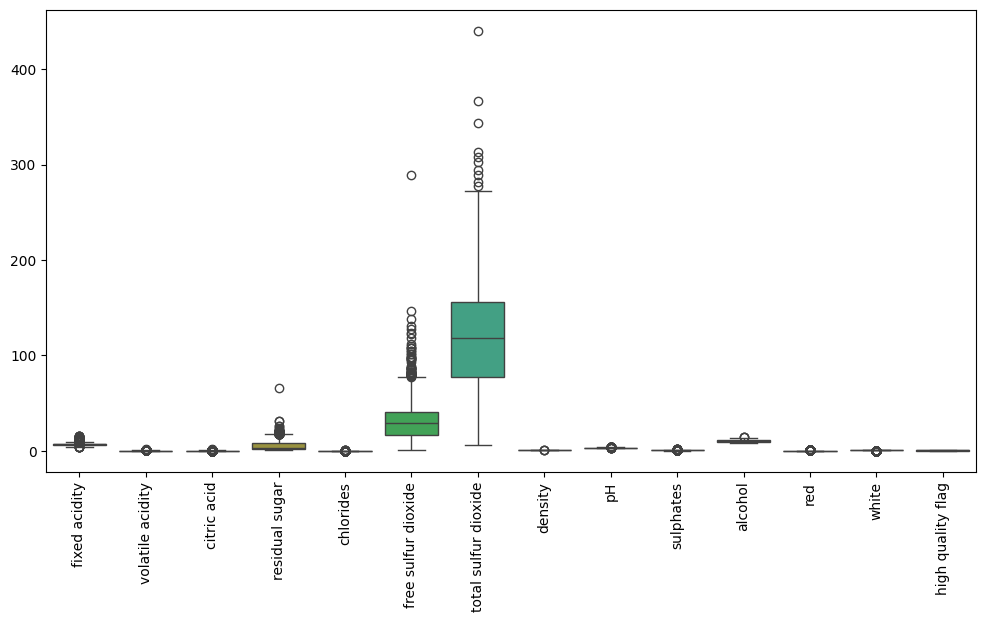

In [14]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.boxplot(data=wine_data)
plt.show()

We can see above that there is a significant amount of rather extreme outlier datapoints in three variables, those being residual sugar, free sulfur dioxide and total sulfur dioxide.  
Since outliers can severely hurt the prediction performance of our model, we should take action in order to remove them from the dataset.  
For this, we will be creating a function that removes outliers using the interquantile range (IGR) method.  
More on the method used: https://online.stat.psu.edu/stat200/lesson/3/3.2

In [15]:
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']:
    wine_data = remove_outliers(wine_data, column)

Checking to see whether the outliers have been removed successfully.

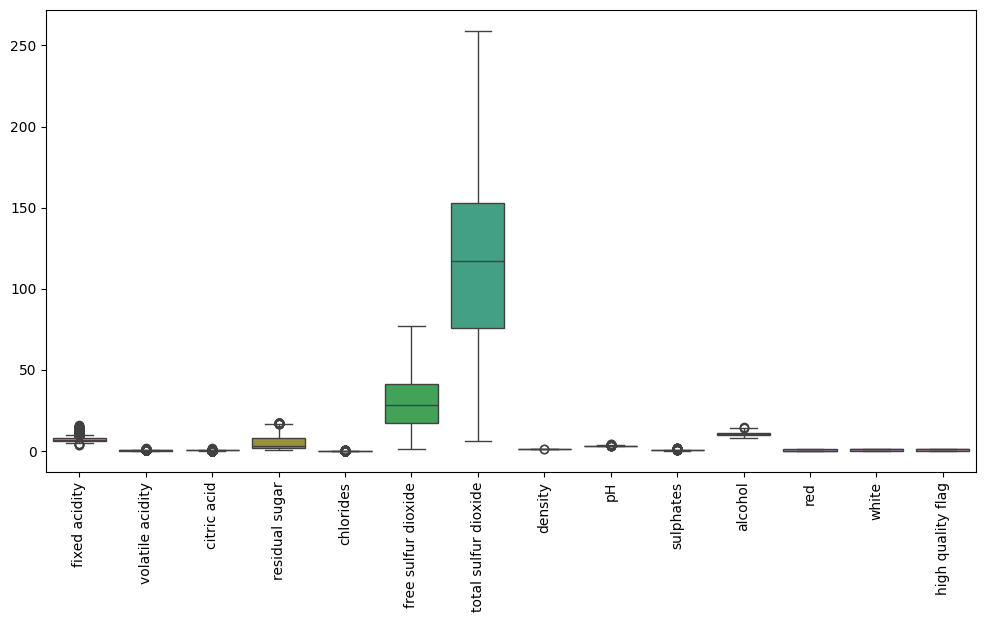

In [16]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.boxplot(data=wine_data)
plt.show()

Seperating the dataset into features and target variables.

In [17]:
X = wine_data.drop(['high quality flag'], axis=1)
y = wine_data['high quality flag']

Splitting the datasets into training-, validation- and testing subsets, with the test set being 20 % of the full dataset, and the validation set being 50 % of the training subset.

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=69420)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=69420)

Next up, we will be the numerical features of our training datasets.  
Scaling the features using the Min Max-scaler ensures that all features contribute equally to the model's performance by normalizing their ranges.  
This prevents features with larger scales from dominating the learning process, leading to faster convergence and potentially improving model accuracy.  
We are using the Min Max-scaler, because our numeric features are not quaranteed to be following a normal distribution, which makes it ideal to use this method over the Standard-scaler for example.  
Another option would have also been to use the Robust scaler, had we not alredy dealt with the outliers beforehand.  
As the 'Y_train' subset does not have numerical variables, we do not need to apply scaling to it.

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

We will now be testing 5 different commonly used classification models with default hyperparameters to get a general overview on which of these models performs the best on our dataset.  

The models that we will be iterating through are:
- **Logistic Regression**
- **Decision Tree Classifier**
- **Random Forest Classifier**
- **Scalable Linear Support Vector (SVC)**
- **K-neighbours Classifier**

The metrics that we will be looking at are the following:
- **Accuracy:** The proportion of correctly predicted instances out of total instances.
- **Precision:** The proportion of true positives out of all positive predictions. In our case, positives refer to high-quality wines.
- **Recall:** The proportion of true positive predicitions out of all positive instances.
- **F1 Score:** A metric that cominbes precision and recall into a single value, by calculating their harmonic mean.
- **ROC AUC:** Measures the overall performance of a classifier by evaluating the area under the ROC-curve, which plots the true positive rate against the false positive rate across different threshold values.

By comparing the performance of the models through these metrics, we will pick the one has the best general performance across all of them, for some further hyperparameter tuning.  
We compare the performance by leveraging our validation subset, so that the model is not exposed to the test-subset, to prevent overfitting.


In [20]:
classifiers = [
    LogisticRegression(random_state=69420),
    DecisionTreeClassifier(random_state=69420),
    RandomForestClassifier(random_state=69420),
    SVC(probability=True, random_state=69420),
    KNeighborsClassifier(),
]
metrics = {}

for model in classifiers:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = round(accuracy_score(y_val, y_pred), 4)
    precision = round(precision_score(y_val, y_pred, average='weighted'), 4)
    recall = round(recall_score(y_val, y_pred, average='weighted'), 4)
    f1 = round(f1_score(y_val, y_pred, average='weighted'), 4)
    roc_auc = round(roc_auc_score(y_val, y_prob), 4) if y_prob is not None else 'N/A'
    
    metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }

metrics_df = pd.DataFrame(metrics).T
print(metrics_df.to_string())

                        Accuracy  Precision  Recall  F1-Score  ROC AUC
LogisticRegression        0.7306     0.7247  0.7306    0.7257   0.7927
DecisionTreeClassifier    0.7813     0.7841  0.7813    0.7824   0.7695
RandomForestClassifier    0.8494     0.8491  0.8494    0.8492   0.9237
SVC                       0.7655     0.7619  0.7655    0.7627   0.8217
KNeighborsClassifier      0.7417     0.7440  0.7417    0.7427   0.8047


Our comparison of the models has shown us that the Random Forest Classifier has the best performance across all 5-metrics.  
We will now be doing some futher hyperparameter tuning using the Grid Search Cross-validation method, to iterate through a grid of hyperparameters, in order to determine which ones would yield the best performance.  
The hyperparameters that we will be testing were suggested by the popular GPT 4o AI-model, when asked what are the most relevant parameters to test in the case of a random forest classifier.

**Note the following cell takes a rather long time to run.**

In [21]:
# Parameter grid, that was suggested by GPT 4o.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=69420), param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Optimal parameters:", grid_search.best_params_)

Optimal parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


The optimal hyperparameters for our Random Forest Classifier-model, based on the above cross-validation are as follows:
- n-estimators: 200
- max_depth = None
- min_samples_split = 2
- min_samples_leaf = 1
- max_features = 'sqrt'

Finally, we will be training our model with the optimal hyperparamters, and seeing how it performs on the test-subset of the data, based on the accuracy score.  
This will give us a rough estimate on how accurately our model can predict whether a wine is low- or high-quality, based on the input features it receives.

In [22]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=69420
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 4)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8384


The model has an accuracy of 83,84 %, meaning that it correctly classifies the quality of approximately 8.4 out of 10 wines.